In [2]:
######## PRELIMS #########

import torch
torch.set_float32_matmul_precision('medium')
import numpy as np
import scipy
from scipy.stats import norm
from scipy.interpolate import interp1d
import plotfancy as pf
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.ticker as ticker
from cycler import cycler
import argparse
pf.housestyle_rcparams()

import os, sys
sys.path.append('../../mist-base/GW')
sys.path.append('../../mist-base/')
sys.path.append('../../mist-base/utils')
sys.path.append('../../')

from src.utils.generators import Simulator_Additive
from simulators.utils import *
from utils.module import CustomLossModule_withBounds, BCELossModule


In [22]:
import gw150814_simulator as gs

In [23]:
gw = gs.GW150814()
wf = gw.generate_time_domain_waveform()

Loading data for H1 at GPS time 1126259462.4
Loading PSD for H1 at GPS time 1126259462.4 [can take O(1 min)]
Loading posterior samples from ../../mist-base/GW/GW150814_posterior_samples.npz


/var/folders/6b/x84gj0ds47n3hjglw1wq1j8m0000gn/T/ipykernel_4299/677517455.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


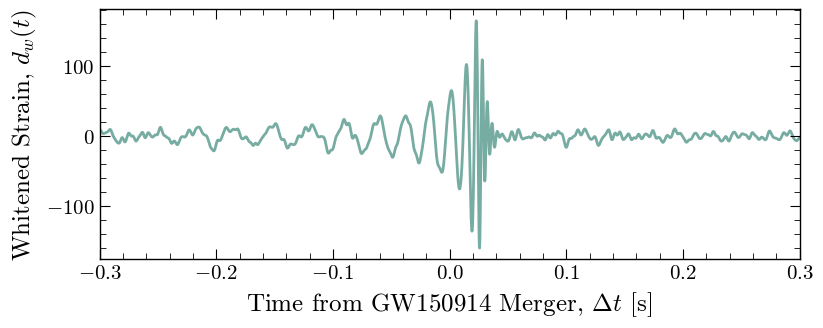

In [24]:
pf.housestyle_rcparams()
fig, ax = pf.create_plot(size=(7,2.5))

ax.plot(gw.times,wf, lw=2, color='#77aca2')
ax.set_xlim([-0.3,0.3])
ax.set_xlabel(r'Time from GW150914 Merger, $\Delta t$ [s]')
ax.set_ylabel(r'Whitened Strain, $d_w(t)$')
pf.fix_plot([ax])

plt.tight_layout()
plt.savefig('figs/waveform.png', dpi=900, bbox_inches = 'tight')

In [25]:
gw.times

array([-2.00009775, -1.99985361, -1.99960947, ...,  1.99916983,
        1.99941397,  1.99965811], shape=(16384,))

In [ ]:
sim = Simulator_Additive(100,1,5,0.2,bkg=True, mode='complex', bump='det')


In [8]:
quantiles = np.array([0.05199686, 0.2145543,  0.58780088, 1.17737921, 1.91882754,
 2.75067576, 3.63463655])

quantiles_long = np.array([7.11978022e-04, 7.96148769e-03, 5.19968566e-02, 2.14554300e-01,
 5.87800876e-01, 1.17737921e+00, 1.91882754e+00, 2.75067576e+00,
 3.63463655e+00, 4.55164698e+00, 5.49045819e+00])

True

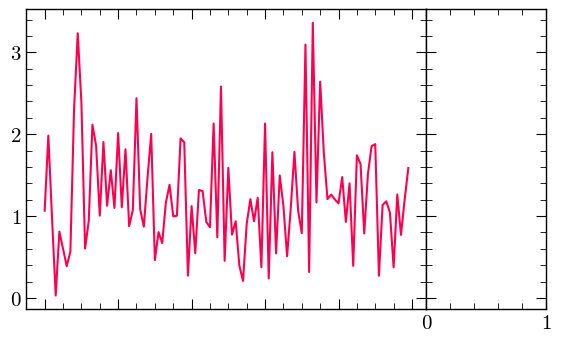

In [18]:
pf.housestyle_rcparams()
fig, ax = pf.create_plot()
plt.setp(ax.get_xticklabels(), visible=False)
ax2 = fig.add_axes((1,0,0.3,1), sharey=ax)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)
noise = sim.get_noise_H0(1)
ax.plot(noise[0], color='#ff004f')

pf.fix_plot([ax,ax2])